In [ ]:
from google.colab import drive
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
drive.mount('/content/drive')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


so we generat
$$  x^2 \left( sinx \right) $$
first...

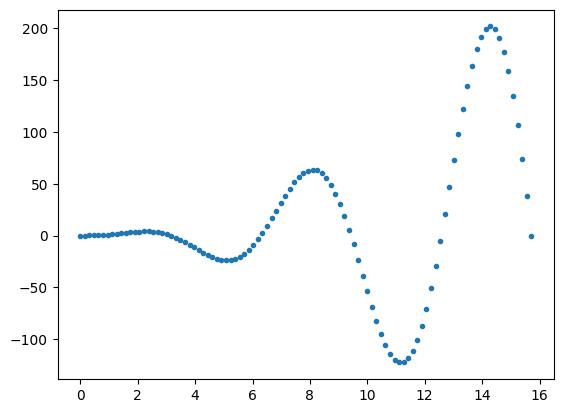

In [ ]:
x = np.linspace(0,5*m.pi,100)
y = np.array([i**2*m.sin(i) for i in x])
X = np.expand_dims(x,axis=1)
Y = y.reshape(100,-1)
X = torch.tensor(X, dtype=torch.float).to('cuda')
Y = torch.tensor(Y, dtype=torch.float).to('cuda')
fig = plt.figure()
plt.plot(x,y,'.')
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

def ideal(x,y):
  return x**2*m.sin(x)

now, we can use it to match train our model

run


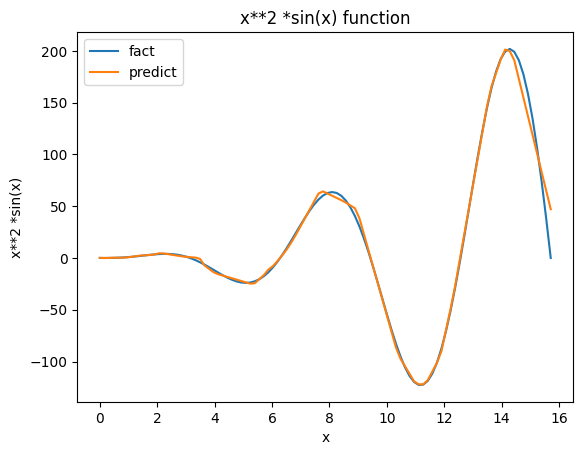

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.net=nn.Sequential(
        nn.Linear(1,20),nn.ReLU(),
        nn.Linear(20,100),nn.ReLU(),
        nn.Linear(100,10),nn.ReLU(),
        nn.Linear(10,1)
        )

  def forward(self,x):
    return self.net(x)

net = Net().to('cuda')
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
print('run')
for epoch in range(5000):  # Increase the number of epochs for better training
  for batch_x,batch_y in dataloader:
    out = net(batch_x)  # Pass the entire input data at once
    loss = F.mse_loss(out, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # print(loss.item())

predict = net(X.to('cuda')).cpu()
plt.plot(x,y,label="fact")
plt.plot(x,predict.detach().numpy(),label="predict")
plt.title("x**2 *sin(x) function")
plt.xlabel("x")
plt.ylabel("x**2 *sin(x)")
plt.legend()
plt.show()

torch.save(net,'/content/drive/MyDrive/ML/Covid19CasesPrediction/model/xSquareAndSin.pt')




we can try to load the model from drive, but be careful we still the class we define then

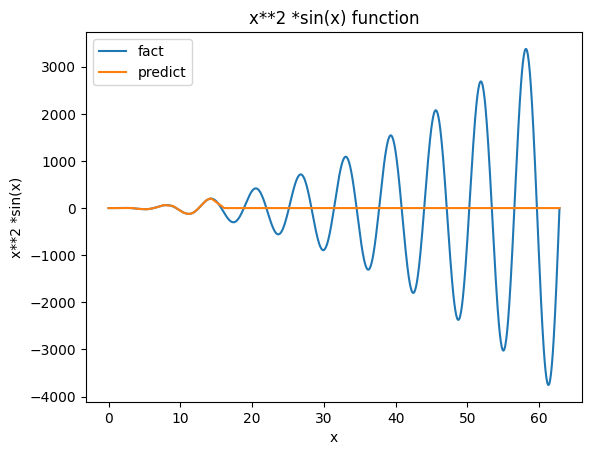

In [ ]:
x = np.linspace(0*m.pi,20*m.pi,1000)
y = np.array([i**2*m.sin(i) for i in x])
X = np.expand_dims(x,axis=1)
Y = y.reshape(100,-1)
X = torch.tensor(X, dtype=torch.float).to('cuda')
Y = torch.tensor(Y, dtype=torch.float).to('cuda')

model=torch.load('/content/drive/MyDrive/ML/Covid19CasesPrediction/model/xSquareAndSin.pt')
predict = model(X.to('cuda')).cpu()
plt.plot(x,y,label="fact")
plt.plot(x,predict.detach().numpy(),label="predict")
plt.title("x**2 *sin(x) function")
plt.xlabel("x")
plt.ylabel("x**2 *sin(x)")
plt.legend()
plt.show()